In [6]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
%matplotlib inline

loading MHR


In [7]:
def pr_hs(r): 
    try:
        return ( 1 / r['pageRank'] ) + ( 1 / r['hits'] )
    except:
        return 0

def pr_len(r): 
    try:
        return ( 1 / r['pageRank'] ) + ( 1 / r['word_count'] )
    except:
        return 0
    
def hs_len(r): 
    try:
        return ( 1 / r['hits'] ) + ( 1 / r['word_count'] )
    except:
        return 0

def pr_hs_len(r): 
    try:
        return ( 1 / r['pr_hs'] ) + ( 1 / r['hs_len'] )
    except:
        return 0

def word_count(r): 
    try:
        return len(tokenizer.tokenize(r["reviewText"]))
    except:
        return 0

In [8]:
reviews_features = pd.read_csv('data/book_sample.csv.gz')
reviews_features = reviews_features[reviews_features.pageRank>0]
print reviews_features.shape
df_columns = reviews_features.select_dtypes(include=['float64','int','int64']).columns
df_columns

(24234, 17)


Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'overall',
       u'unixReviewTime', u'helpfulness', u'tot', u'powerWithStar',
       u'pageRank', u'hits'],
      dtype='object')

In [9]:
reviews_features['word_count']=reviews_features.apply(word_count,axis=1)
reviews_features['pr_hs']=reviews_features.apply(pr_hs,axis=1)
reviews_features['pr_len']=reviews_features.apply(pr_len,axis=1)
reviews_features['hs_len']=reviews_features.apply(hs_len,axis=1)
reviews_features['pr_hs_len']=reviews_features.apply(pr_hs_len,axis=1)
reviews_features.shape

(24234, 22)

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


pr_hs ndcg=0.467321115009
pr_len ndcg=0.465769832771
hs_len ndcg=0.469452279099
pr_hs_len ndcg=0.77131406432
PageRank ndcg=0.770294098881
HITs ndcg=0.772097593674
MHR ndcg=0.766695048499
461
461
461
461
461
461
461


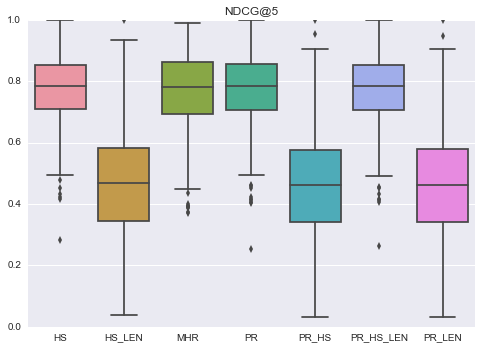

In [10]:
import seaborn as sns
k=5

ndcg_pr_hs=ndcg.calc_ndcg(reviews_features,'pr_hs',k) 
corr_pr_hs=ndcg.calc_corr(reviews_features,'pr_hs') 
print "pr_hs ndcg="+str(np.mean(ndcg_pr_hs))

ndcg_pr_len=ndcg.calc_ndcg(reviews_features,'pr_len',k) 
corr_pr_len=ndcg.calc_corr(reviews_features,'pr_len') 
print "pr_len ndcg="+str(np.mean(ndcg_pr_len))

ndcg_hs_len=ndcg.calc_ndcg(reviews_features,'hs_len',k) 
corr_hs_len=ndcg.calc_corr(reviews_features,'hs_len') 
print "hs_len ndcg="+str(np.mean(ndcg_hs_len))

ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',k) 
corr_pr_hs_len=ndcg.calc_corr(reviews_features,'pr_hs_len') 
print "pr_hs_len ndcg="+str(np.mean(ndcg_pr_hs_len))

ndcg_pr=ndcg.calc_ndcg(reviews_features,'pageRank',k) 
corr_pr=ndcg.calc_corr(reviews_features,'pageRank') 
print "PageRank ndcg="+str(np.mean(ndcg_pr))

ndcg_hs=ndcg.calc_ndcg(reviews_features,'hits',k) 
corr_hs=ndcg.calc_corr(reviews_features,'hits') 
print "HITs ndcg="+str(np.mean(ndcg_hs))

ndcg_mhr=ndcg.calc_ndcg(reviews_features,'powerWithStar',k) 
corr_mhr=ndcg.calc_corr(reviews_features,'powerWithStar') 
print "MHR ndcg="+str(np.mean(ndcg_mhr))

#ndcg_mhrs=ndcg.calc_ndcg(reviews_features,'MHRs',k) 
#corr_mhrs=ndcg.calc_corr(reviews_features,'MHRs') 
#print "MHRs ndcg="+str(np.mean(ndcg_mhrs))

print (len(ndcg_pr_hs))
print (len(ndcg_pr_len))
print (len(ndcg_hs_len))
print (len(ndcg_pr_hs_len))
print (len(ndcg_hs))
print (len(ndcg_pr))
print (len(ndcg_mhr))
#print (len(ndcg_mhrs))

tip={}
tip['PR_HS']=ndcg_pr_hs
tip['PR_LEN']=ndcg_pr_len
tip['HS_LEN']=ndcg_hs_len
tip['PR_HS_LEN']=ndcg_pr_hs_len
tip['HS']=ndcg_hs
tip['PR']=ndcg_pr
tip['MHR']=ndcg_mhr
#tip['MHRs']=ndcg_mhrs
df = pd.DataFrame(tip)
ax = sns.boxplot(data=df)
#ax = sns.swarmplot(data=df, color=".25")
ax.set_title('NDCG@'+str(k))